In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Preprocessing the data

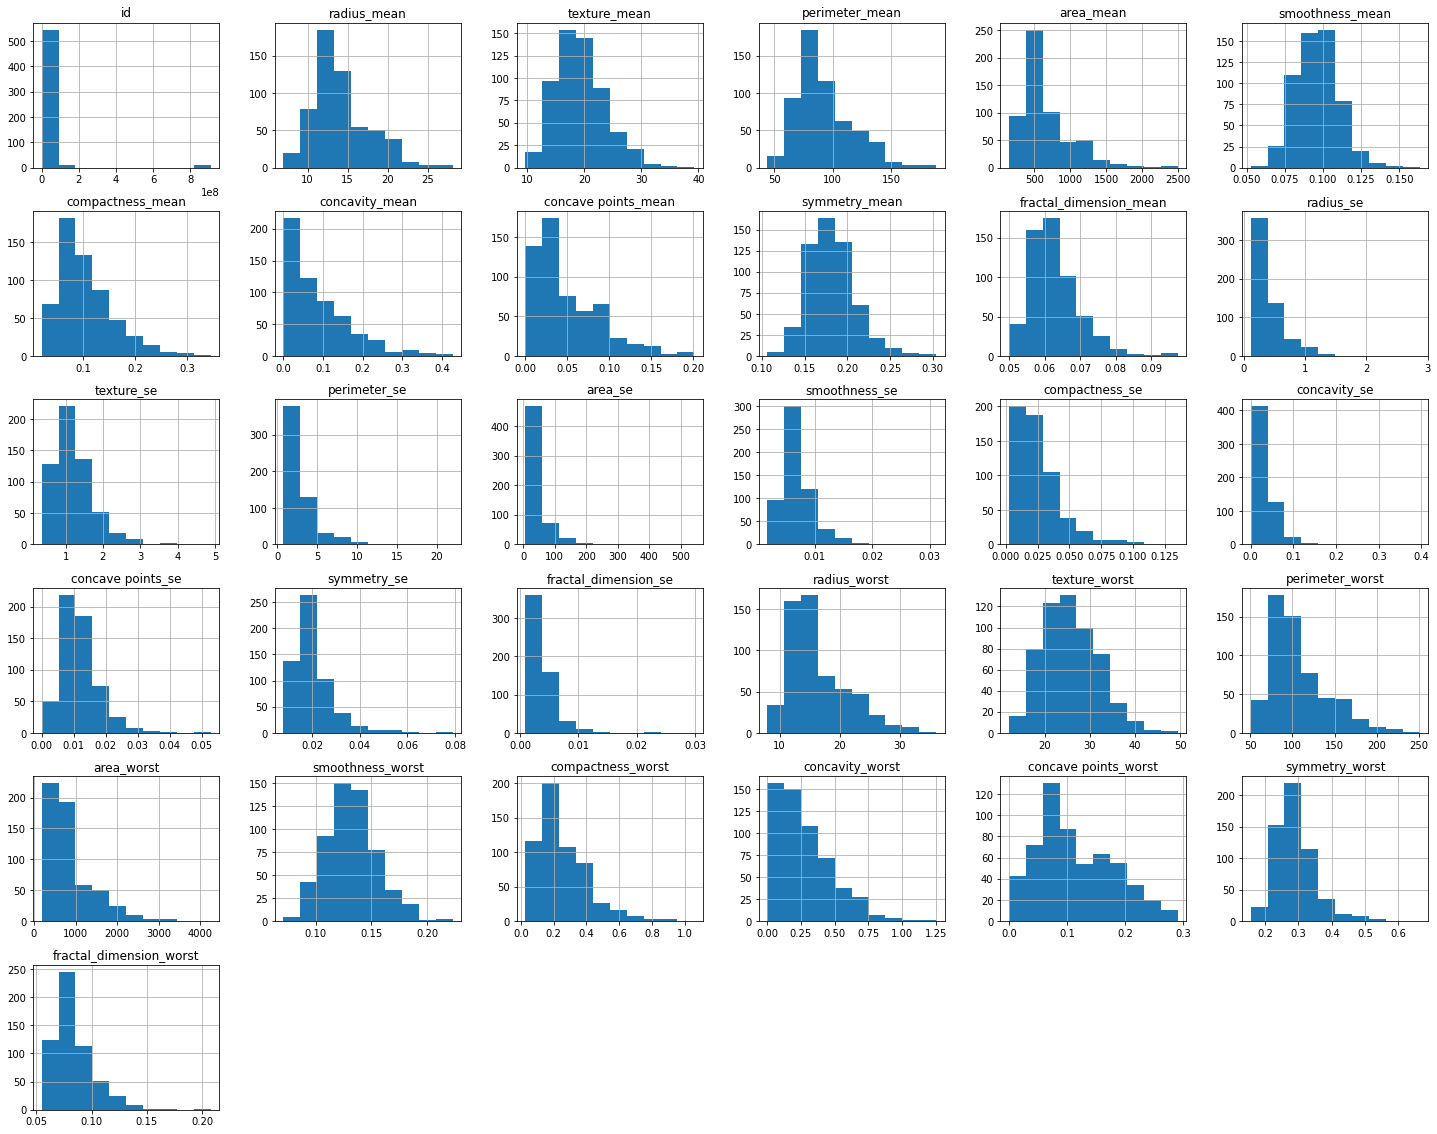

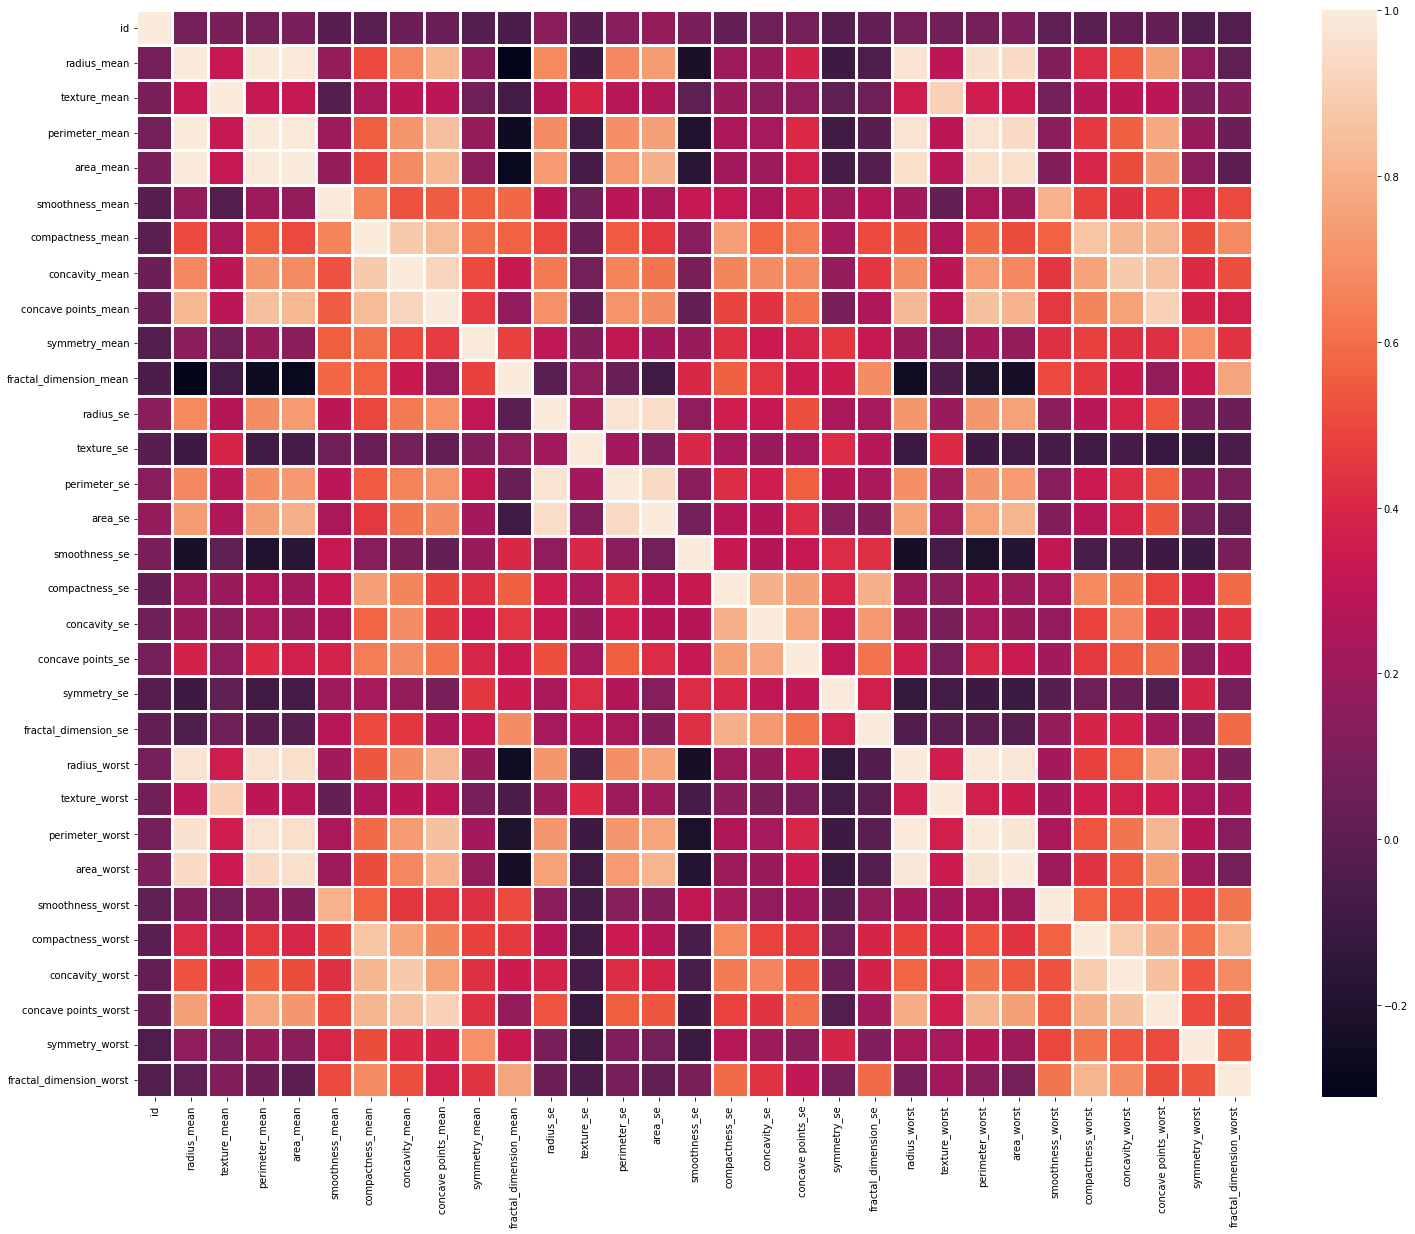

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bigdata_projects/cancer_detection/data.csv')
data = data.dropna(axis=1)

## find the realtion between columns
## plot histograms and other ploting

data.hist(figsize=(25,20))

plt.figure(figsize=(25,20))

seaborn.heatmap(data.corr(),annot=False,linewidths=2)

In [ ]:
# Label the diagnosis column 
le = LabelEncoder()
diagnosis = le.fit_transform(data.iloc[:,1].values)

x = data.iloc[:,2:].values

# split data to train and test

x_train,x_test,y_train,y_test = train_test_split(x,diagnosis,test_size=0.33,random_state=0,stratify=diagnosis)

# Scale feature to train it in model

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, num_classes=None)
# y_test = to_categorical(y_test, num_classes=None)
# print ("Y = ",y_train.shape)
# print ("X = ",x_train.shape)


# Model

In [ ]:
model = Sequential()
model.add(Dense(100, activation = "relu", input_dim = 30))
model.add(Dropout(0.2))
model.add(Dense(100, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

model.summary()

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               3100      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 2)                 202       
                                                                 
Total params: 13,402
Trainable params: 13,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Running Model

his = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=35,epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 0s 16ms/step - loss: 0.3823 - accuracy: 0.8819 - val_loss: 0.2250 - val_accuracy: 0.9362
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1741 - accuracy: 0.9554 - val_loss: 0.1527 - val_accuracy: 0.9362
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1107 - accuracy: 0.9633 - val_loss: 0.1378 - val_accuracy: 0.9415
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0938 - accuracy: 0.9659 - val_loss: 0.1285 - val_accuracy: 0.9521
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.1251 - val_accuracy: 0.9468
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0617 - accuracy: 0.9843 - val_loss: 0.1237 - val_accuracy: 0.9521
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0547 - accuracy: 0.9816 - val_loss: 0.1324 - val_accuracy: 0.9521
Epoch 8/100
11/11 [=====

## Plot Metrics

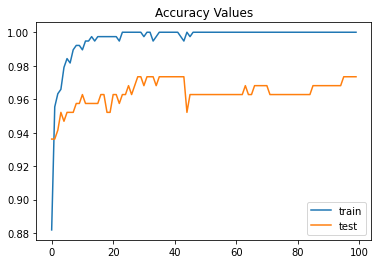

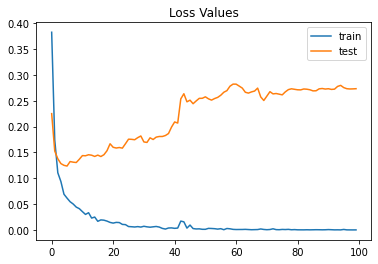

In [ ]:
def plot_metrics(model_name, metric = 'accuracy'):
    if metric == 'loss':
        plt.title("Loss Values")
        plt.plot(model_name.history['loss'], label = 'train')
        plt.plot(model_name.history['val_loss'], label = 'test')
        plt.legend()
        plt.show()
    else:
        plt.title("Accuracy Values")
        plt.plot(model_name.history['accuracy'], label='train') 
        plt.plot(model_name.history['val_accuracy'], label='test') 
        plt.legend()
        plt.show()
 

plot_metrics(his, 'accuracy')
plot_metrics(his, 'loss')

In [ ]:
pred = np.argmax(model.predict(x_test),axis=1)

cnf = confusion_matrix(y_test.argmax(axis=0),pred)

cnf

TypeError: ignored